<a href="https://colab.research.google.com/github/AlisileAnusri/Gamma_Ray_Classification/blob/Anu/GammaRayClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/telescope_data.csv')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
lc=LabelEncoder()
data['class']=lc.fit_transform(data['class'])
dic={}
for k in range(len(lc.classes_)):
  dic[lc.classes_[k]]= lc.transform(lc.classes_)[k]
print(dic)

{'g': 0, 'h': 1}


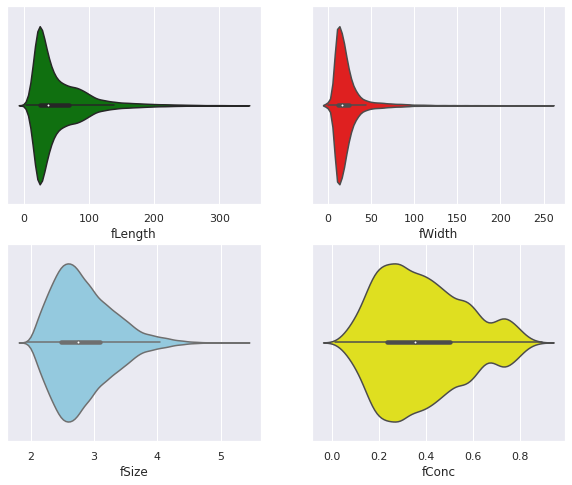

In [ ]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data,x="fLength",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=data,x='fWidth',kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=data,x="fSize",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=data,x="fConc",kde=True,ax=axs[1,1],color='yellow')

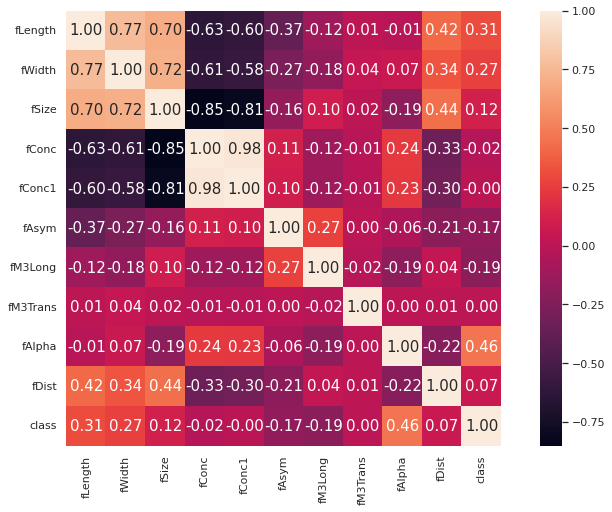

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),
              cbar=True,
              annot=True,square=True,fmt='.2f',annot_kws={'size':15},
              )

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

In [ ]:
X=data.iloc[:,0:-1].values
Y=data.iloc[:,-1].values

In [ ]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot("fSize","class",data=data,palette="inferno")

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1,n_jobs=2)
classifier1.fit(x_train,y_train)
c1_pred=classifier1.predict(x_test)
print('____________Random forest classifier____________')
print('\nAccuracy:{:.2f}%'.format((accuracy_score(y_test,c1_pred)*100)))
print('F1 score: ',f1_score(y_test,c1_pred))
print('Recall :',recall_score(y_test,c1_pred))
print('Precision:',precision_score(y_test,c1_pred))
cm= confusion_matrix(y_test,c1_pred)
print('Confusion matrix')
print(cm)

____________Random forest classifier____________

Accuracy:86.71%
F1 score:  0.7927868852459017
Recall : 0.7187871581450654
Precision: 0.8837719298245614
Confusion matrix
[[2914  159]
 [ 473 1209]]


In [ ]:
classifier2 = SVC()
classifier2.fit(x_train,y_train)
c2_pred=classifier2.predict(x_test)
print('___________SVC___________')
print('\nAccuracy:{:.2f}%'.format((accuracy_score(y_test,c2_pred)*100)))
print('F1 score:{:.2f}'.format(f1_score(y_test,c2_pred)))
print('Recall :{:.2f}'.format(recall_score(y_test,c2_pred)))
print('Precision:{:.2f}'.format(precision_score(y_test,c2_pred)))
print('Confusion matrix')
cm= confusion_matrix(y_test,c2_pred)
print(cm)

___________SVC___________

Accuracy:86.33%
F1 score:0.78
Recall :0.69
Precision:0.90
Confusion matrix
[[2946  127]
 [ 523 1159]]


In [ ]:
classifier3 = KNeighborsClassifier()
classifier3.fit(x_train,y_train)
c3_pred=classifier3.predict(x_test)
print('___________KNN__________')
print('\nAccuracy:{:.2f}%'.format((accuracy_score(y_test,c3_pred)*100)))
print('F1 score:{:.2f}'.format(f1_score(y_test,c3_pred)))
print('Recall :{:.2f}'.format(recall_score(y_test,c3_pred)))
print('Precision:{:.2f}'.format(precision_score(y_test,c3_pred)))
print('Confusion matrix')
cm= confusion_matrix(y_test,c3_pred)
print(cm)


___________KNN__________

Accuracy:97.54%
F1 score:0.96
Recall :0.95
Precision:0.98
Confusion matrix
[[3082   38]
 [  79 1556]]


In [ ]:
classifier4 = LogisticRegression()
classifier4.fit(x_train,y_train)
c4_pred=classifier4.predict(x_test)
print('__________Logistic Regression________')
print('\nAccuracy:{:.2f}%'.format((accuracy_score(y_test,c4_pred)*100)))
print('Confusion matrix')
cm= confusion_matrix(y_test,c4_pred)
print(cm)
print('F1 score:{:.2f}'.format(f1_score(y_test,c4_pred)))
print('Recall :{:.2f}'.format(recall_score(y_test,c4_pred)))
print('Precision:{:.2f}'.format(precision_score(y_test,c4_pred)))

__________Logistic Regression________

Accuracy:99.60%
Confusion matrix
[[3110   10]
 [   9 1626]]
F1 score:0.99
Recall :0.99
Precision:0.99


In [ ]:
classifier5 = DecisionTreeClassifier(criterion='entropy', 
                               max_depth=3, random_state=0)
classifier5.fit(x_train,y_train)
c5_pred=classifier5.predict(x_test)
print('__________Decision tree clssifier__________')
print('\nAccuracy:{:.2f}%'.format((accuracy_score(y_test,c5_pred)*100)))
print('F1 score:{:.2f}'.format(f1_score(y_test,c5_pred)))
print('Recall :{:.2f}'.format(recall_score(y_test,c5_pred)))
print('Precision:{:.2f}'.format(precision_score(y_test,c5_pred)))
print('Confusion matrix')
cm= confusion_matrix(y_test,c5_pred)
print(cm)

__________Decision tree clssifier__________

Accuracy:100.00%
F1 score:1.00
Recall :1.00
Precision:1.00
Confusion matrix
[[3120    0]
 [   0 1635]]


In [ ]:
xval=x_test[:11]
#print(xval)
yval=y_test[:11]    
print('Actual values: ',yval)
pred=classifier1.predict(x_test[:11])
print('Predicted values: ',pred)
for e in pred:
  if e==0:
    print('Gamma',end=" ")
  else:
    print('Hadron',end=" ")

Actual values:  [0 0 0 0 1 1 0 1 0 1 0]
Predicted values:  [0 0 0 0 1 1 0 1 0 1 0]
Gamma Gamma Gamma Gamma Hadron Hadron Gamma Hadron Gamma Hadron Gamma 

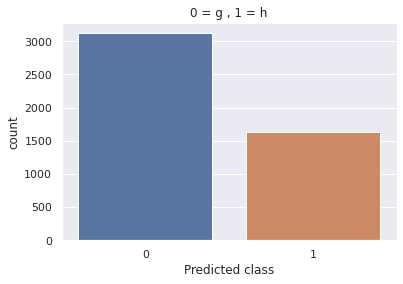

In [ ]:
sns.countplot(c1_pred,data=data)
plt.title('0 = g , 1 = h')
plt.xlabel('Predicted class')
plt.show()

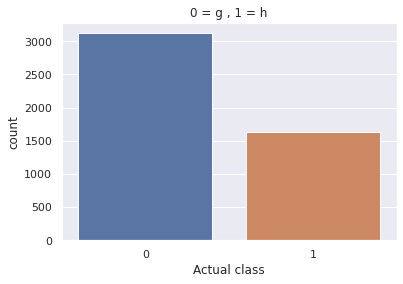

In [ ]:
sns.countplot(y_test,data=data)
plt.title('0 = g , 1 = h')
plt.xlabel('Actual class')
plt.show()